Import libraries

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import keras
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

Load dataset

In [2]:
#Load dataset
dataset = pd.read_csv("heart.csv")

#Display dataset
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,64,1,0,145,212,0,0,132,0,2.0,1,2,1,0
1020,64,1,0,145,212,0,0,132,0,2.0,1,2,1,0
1021,64,1,0,145,212,0,0,132,0,2.0,1,2,1,0
1022,64,1,0,145,212,0,0,132,0,2.0,1,2,1,0


In [3]:
# count label target
dataset['target'].value_counts().sort_values(ascending=True)

0    509
1    515
Name: target, dtype: int64

Preprocessed data

In [4]:
#Read target column as y
y=dataset.target

#Take all of column and drop target column as x
x=dataset.drop('target',axis=1)

#Normalizing data to value from 0-1
min_max_scaler = preprocessing.MinMaxScaler() 
x_scaled = min_max_scaler.fit_transform(x)

#Display normalized data
df = pd.DataFrame(x_scaled, columns = ['age','sex','cp', 'trestbps', 'chol', 'fbs','restecg' , 'thalach', 'exang', 'oldpeak' , 'slope' , 'ca' , 'thal'])
print(df)

# Split data into training and test 
X_train,X_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=4)

print("X_train shape : " , X_train.shape)
print("X_test shape : " , X_test.shape)
print("Y_train shape : " , y_train.shape)
print("Y_test shape : " , y_test.shape)

           age  sex   cp  trestbps      chol  fbs  restecg   thalach  exang  \
0     0.479167  1.0  0.0  0.292453  0.196347  0.0      0.5  0.740458    0.0   
1     0.500000  1.0  0.0  0.433962  0.175799  1.0      0.0  0.641221    1.0   
2     0.854167  1.0  0.0  0.481132  0.109589  0.0      0.5  0.412214    1.0   
3     0.666667  1.0  0.0  0.509434  0.175799  0.0      0.5  0.687023    0.0   
4     0.687500  0.0  0.0  0.415094  0.383562  1.0      0.5  0.267176    0.0   
...        ...  ...  ...       ...       ...  ...      ...       ...    ...   
1019  0.729167  1.0  0.0  0.481132  0.196347  0.0      0.0  0.465649    0.0   
1020  0.729167  1.0  0.0  0.481132  0.196347  0.0      0.0  0.465649    0.0   
1021  0.729167  1.0  0.0  0.481132  0.196347  0.0      0.0  0.465649    0.0   
1022  0.729167  1.0  0.0  0.481132  0.196347  0.0      0.0  0.465649    0.0   
1023  0.729167  1.0  0.0  0.481132  0.196347  0.0      0.0  0.465649    0.0   

       oldpeak  slope    ca      thal  
0     0.161

Make model

In [5]:
# Input layer consists 13 neuron
# Hidden layer consists 10 neuron
# Output layer consists 1 neuron
# Activation function : sigmoid

model = Sequential()
model.add(Dense(10, input_dim=13, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
trained = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
26/26 [==============================] - 1s 14ms/step - loss: 0.2736 - accuracy: 0.3284 - val_loss: 0.2688 - val_accuracy: 0.3561
Epoch 2/100
26/26 [==============================] - 0s 3ms/step - loss: 0.2673 - accuracy: 0.3309 - val_loss: 0.2627 - val_accuracy: 0.3610
Epoch 3/100
26/26 [==============================] - 0s 3ms/step - loss: 0.2618 - accuracy: 0.3443 - val_loss: 0.2574 - val_accuracy: 0.3854
Epoch 4/100
26/26 [==============================] - 0s 3ms/step - loss: 0.2566 - accuracy: 0.3748 - val_loss: 0.2525 - val_accuracy: 0.4537
Epoch 5/100
26/26 [==============================] - 0s 3ms/step - loss: 0.2516 - accuracy: 0.4518 - val_loss: 0.2475 - val_accuracy: 0.5317
Epoch 6/100
26/26 [==============================] - 0s 3ms/step - loss: 0.2469 - accuracy: 0.5592 - val_loss: 0.2430 - val_accuracy: 0.6439
Epoch 7/100
26/26 [==============================] - 0s 3ms/step - loss: 0.2423 - accuracy: 0.6252 - val_loss: 0.2381 - val_accuracy: 0.6780
Epoch 8/100


In [6]:
train_score = model.evaluate(X_train, y_train, verbose=0)

print("Train loss : {:.2f}%".format(train_score[0] *100))
print("Train accuracy : {:.2f}%".format(train_score[1] *100))

test_score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss : {:.2f}%".format(test_score[0] *100))
print("Test accuracy : {:.2f}%".format(test_score[1] *100))

model.summary()

Train loss : 11.45%
Train accuracy : 84.98%
Test loss : 10.80%
Test accuracy : 84.88%
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                140       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


Loss and accuracy graph

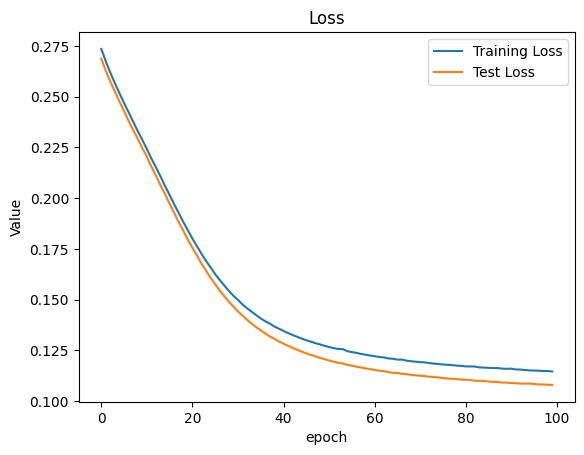

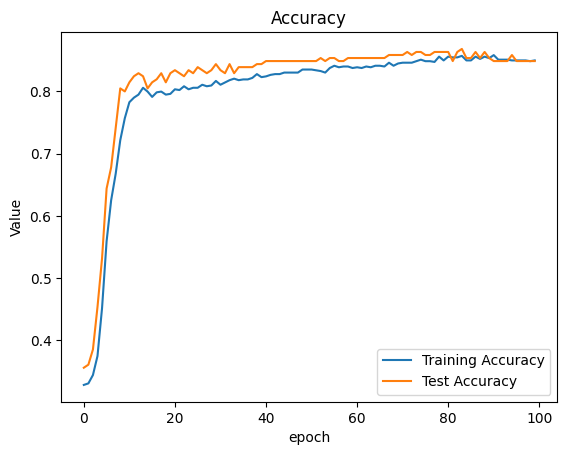

In [7]:
plt.plot(trained.history['loss'])
plt.plot(trained.history['val_loss'])
plt.title('Loss')
plt.ylabel('Value')
plt.xlabel('epoch')
plt.legend(['Training Loss' , 'Test Loss'], loc='upper right')
plt.show()

plt.plot(trained.history['accuracy'] )
plt.plot(trained.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Value')
plt.xlabel('epoch')
plt.legend(['Training Accuracy' , 'Test Accuracy'], loc='lower right')
plt.show()

In [8]:
model.save('BPNN.h5')

Making prediction

In [9]:
y_pred = model.predict(X_test)
y_test = np.array(y_test)
hold_test = 0
true_pred = 0
swap_pred = []
false_pred = 0

for i in range(205):
    if y_pred[i] <= 0.5:
        swap_pred.append(0)
    else : 
        swap_pred.append(1)

for i in range(205) :
        
    if swap_pred[i] == y_test[i] :
        prediction = print("Predicted Value : " , swap_pred[i] , " Actual Value : " , y_test[i] , " [True]")
        true_pred = true_pred + 1
    else : 
        prediction = print("Predicted Value : " , swap_pred[i] , " Actual Value : " , y_test[i] , " [False]")
        false_pred = false_pred + 1
    
print("Total of correct prediction : " , true_pred)
print("Total of false prediction : " , false_pred)
print("Accuracy of prediction : {:.2f}%".format(true_pred/205 * 100))

7/7 [==============================] - 0s 2ms/step
Predicted Value :  0  Actual Value :  0  [True]
Predicted Value :  1  Actual Value :  1  [True]
Predicted Value :  0  Actual Value :  0  [True]
Predicted Value :  0  Actual Value :  0  [True]
Predicted Value :  0  Actual Value :  0  [True]
Predicted Value :  1  Actual Value :  1  [True]
Predicted Value :  1  Actual Value :  1  [True]
Predicted Value :  1  Actual Value :  1  [True]
Predicted Value :  1  Actual Value :  1  [True]
Predicted Value :  0  Actual Value :  0  [True]
Predicted Value :  0  Actual Value :  0  [True]
Predicted Value :  1  Actual Value :  0  [False]
Predicted Value :  1  Actual Value :  1  [True]
Predicted Value :  1  Actual Value :  1  [True]
Predicted Value :  0  Actual Value :  0  [True]
Predicted Value :  0  Actual Value :  0  [True]
Predicted Value :  0  Actual Value :  0  [True]
Predicted Value :  1  Actual Value :  1  [True]
Predicted Value :  1  Actual Value :  0  [False]
Predicted Value :  0  Actual Value 

In [10]:
prediction.to_csv("output.csv")

AttributeError: 'NoneType' object has no attribute 'to_csv'